# Pattern Recognition 2019-20: Pre-Lab 3
#### Christos Lamprakos, 03002910
#### Konstantinos Touloupas, 00000000

### Step 0
The exercise data were added to this notebook via the given [link][dl]. The cell below prints all data subfolders.  

[dl]: <https://www.kaggle.com/geoparslp/patreco3-multitask-affective-music>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import seaborn as sns

sns.set ()

mainPath = '/kaggle/input/patreco3-multitask-affective-music/data'
os.listdir (mainPath)

# Any results you write to the current directory are saved as output.

['multitask_dataset_beat',
 'multitask_dataset',
 'fma_genre_spectrograms_beat',
 'fma_genre_spectrograms']

### Step 1
To choose 2 random samples with different labels, we first use the ```train_labels.txt``` file. Then we use the directions in [this kernel][dir] to isolate the mel frequencies. Finally, after importing ```librosa``` along with ```pyplot```, we use them to visualize the requested spectrograms.

[dir]: <https://www.kaggle.com/geoparslp/data-loading-tutorial>

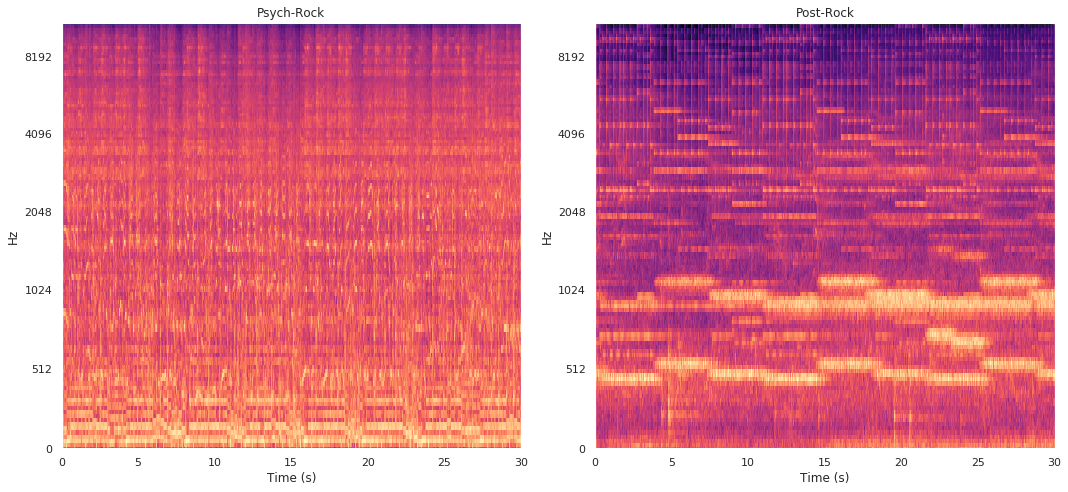

In [2]:
labelPath = os.path.join (mainPath, 'fma_genre_spectrograms/train_labels.txt')
test = np.loadtxt (labelPath, dtype = 'str', skiprows = 1)

idx1 = np.random.randint (len (test))
label1 = test[idx1, 1]
name1 = test[idx1, 0]
name1 = name1[:len (name1) - 3]
while True:
    idx2 = np.random.randint (len (test))
    label2 = test[idx2, 1]
    name2 = test[idx2, 0]
    name2 = name2[:len (name2) - 3]
    # Careful! We don't want the two files to have the same label.
    if label1 != label2:
        break
# Remove the .gz part from selected file names, to align with actual files.
file1Path = os.path.join (mainPath, os.path.join ('fma_genre_spectrograms/train', name1))
file2Path = os.path.join (mainPath, os.path.join ('fma_genre_spectrograms/train', name2))
# Load files and isolate mel frequencies.
file1 = np.load (file1Path)
file2 = np.load (file2Path)
mel1, chrom1 = file1[:128], file1[128:]
mel2, chrom2 = file2[:128], file2[128:]
# Libraries for visualization.
from librosa.display import specshow
import matplotlib.pyplot as plt

fig = plt.figure (figsize = (15, 7))
ax1 = fig.add_subplot (1, 2, 1)
ax1 = specshow (mel1, x_axis = 's', y_axis = 'mel')
ax1.set_title (label1)
ax2 = fig.add_subplot (1, 2, 2)
ax2 = specshow (mel2, x_axis = 's', y_axis = 'mel')
ax2.set_title (label2)
fig.tight_layout ()
plt.show ()

A spectrogram visualizes a signal's frequency distribution as it changes over time. The third dimension, as it is signified by the blue-to-red bandwidth, signifies each frequency's amplitude. In this way, an experienced person can 'read' a spectrogram and understand, for instance, whether it maps to human speech, random noise, or the sound of a music instrument. In other words, a spectrogram provides enough information to be used in a pattern recognition task.

Taking the above figures as an example, the differences between two distinct music genres are obvious even with a blind eye. Note that even though I used the ```mel``` argument in ```specshow```, the y-axis in the plots is 'Hz'. Anyway, the mel scale is a more human-centered transformation of a signal's frequencies, based on pitch comparisons.

### Step 2
We use the ```shape``` attribute to get the signals' dimensions.

In [3]:
print (mel1.shape)
print (mel2.shape)

(128, 1293)
(128, 1293)


We see that the spectrogram has 1293 timesteps. It wouldn't be efficient to train an LSTM on so many steps. If we did, we would need to include a large number of weights in the output layer, if we wanted the LSTM to have a chance of learning in so deep a time horizon. This would lead to an unreasonably large training time.

Next, we follow the same procedure as in Step 1 for beat-synced spectrograms.

>***ATTENTION:*** For some reason, the exact same names (```id.fused.full.npy```) have to be used in both the full and beatsync folders. This is counterintuitive, contradictory with the file names noted in beatsync folder's ```train_labels.txt``` and should have been clarified in a more direct way than the (still helpful) data loading tutorial.

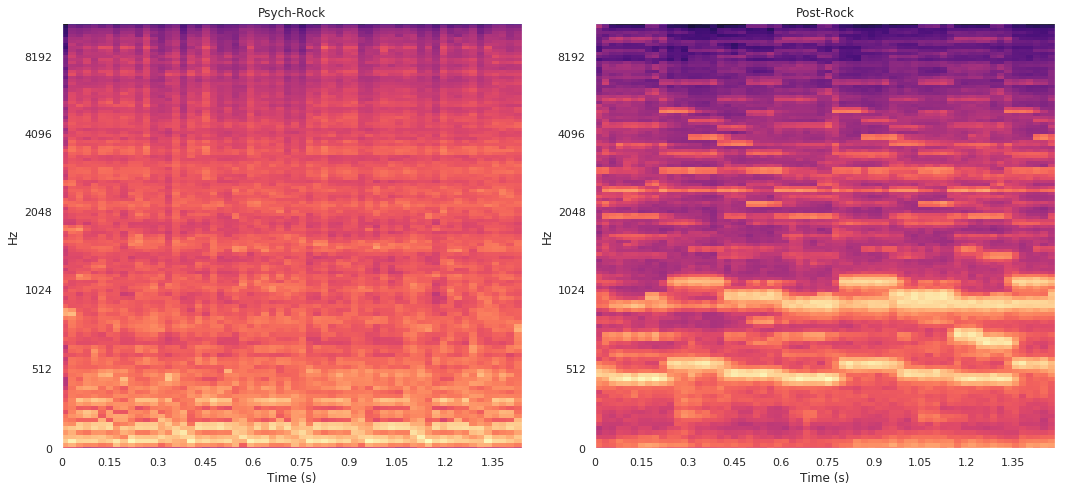

In [4]:
file1Path = os.path.join (mainPath, os.path.join ('fma_genre_spectrograms_beat/train', name1))
file2Path = os.path.join (mainPath, os.path.join ('fma_genre_spectrograms_beat/train', name2))
# Load files and isolate mel frequencies.
file1 = np.load (file1Path)
file2 = np.load (file2Path)
mel1_b, chrom1_b = file1[:128], file1[128:]
mel2_b, chrom2_b = file2[:128], file2[128:]
# Libraries for visualization.
from librosa.display import specshow
import matplotlib.pyplot as plt

fig = plt.figure (figsize = (15, 7))
ax1 = fig.add_subplot (1, 2, 1)
ax1 = specshow (mel1_b, x_axis = 's', y_axis = 'mel')
ax1.set_title (label1)
ax2 = fig.add_subplot (1, 2, 2)
ax2 = specshow (mel2_b, x_axis = 's', y_axis = 'mel')
ax2.set_title (label2)
fig.tight_layout ()
plt.show ()

In [5]:
print (mel1_b.shape)
print (mel2_b.shape)

(128, 62)
(128, 64)


It is clear from the above graphs that in the beat-synced case the resolution of the signal is worse, but much of the information is preserved. Respectively, the timesteps have been reduced to less than 100. This size should be much more appropriate for LSTM training.

### Step 3
All requested chromagrams have been extracted from the previous steps. We visualize them below.

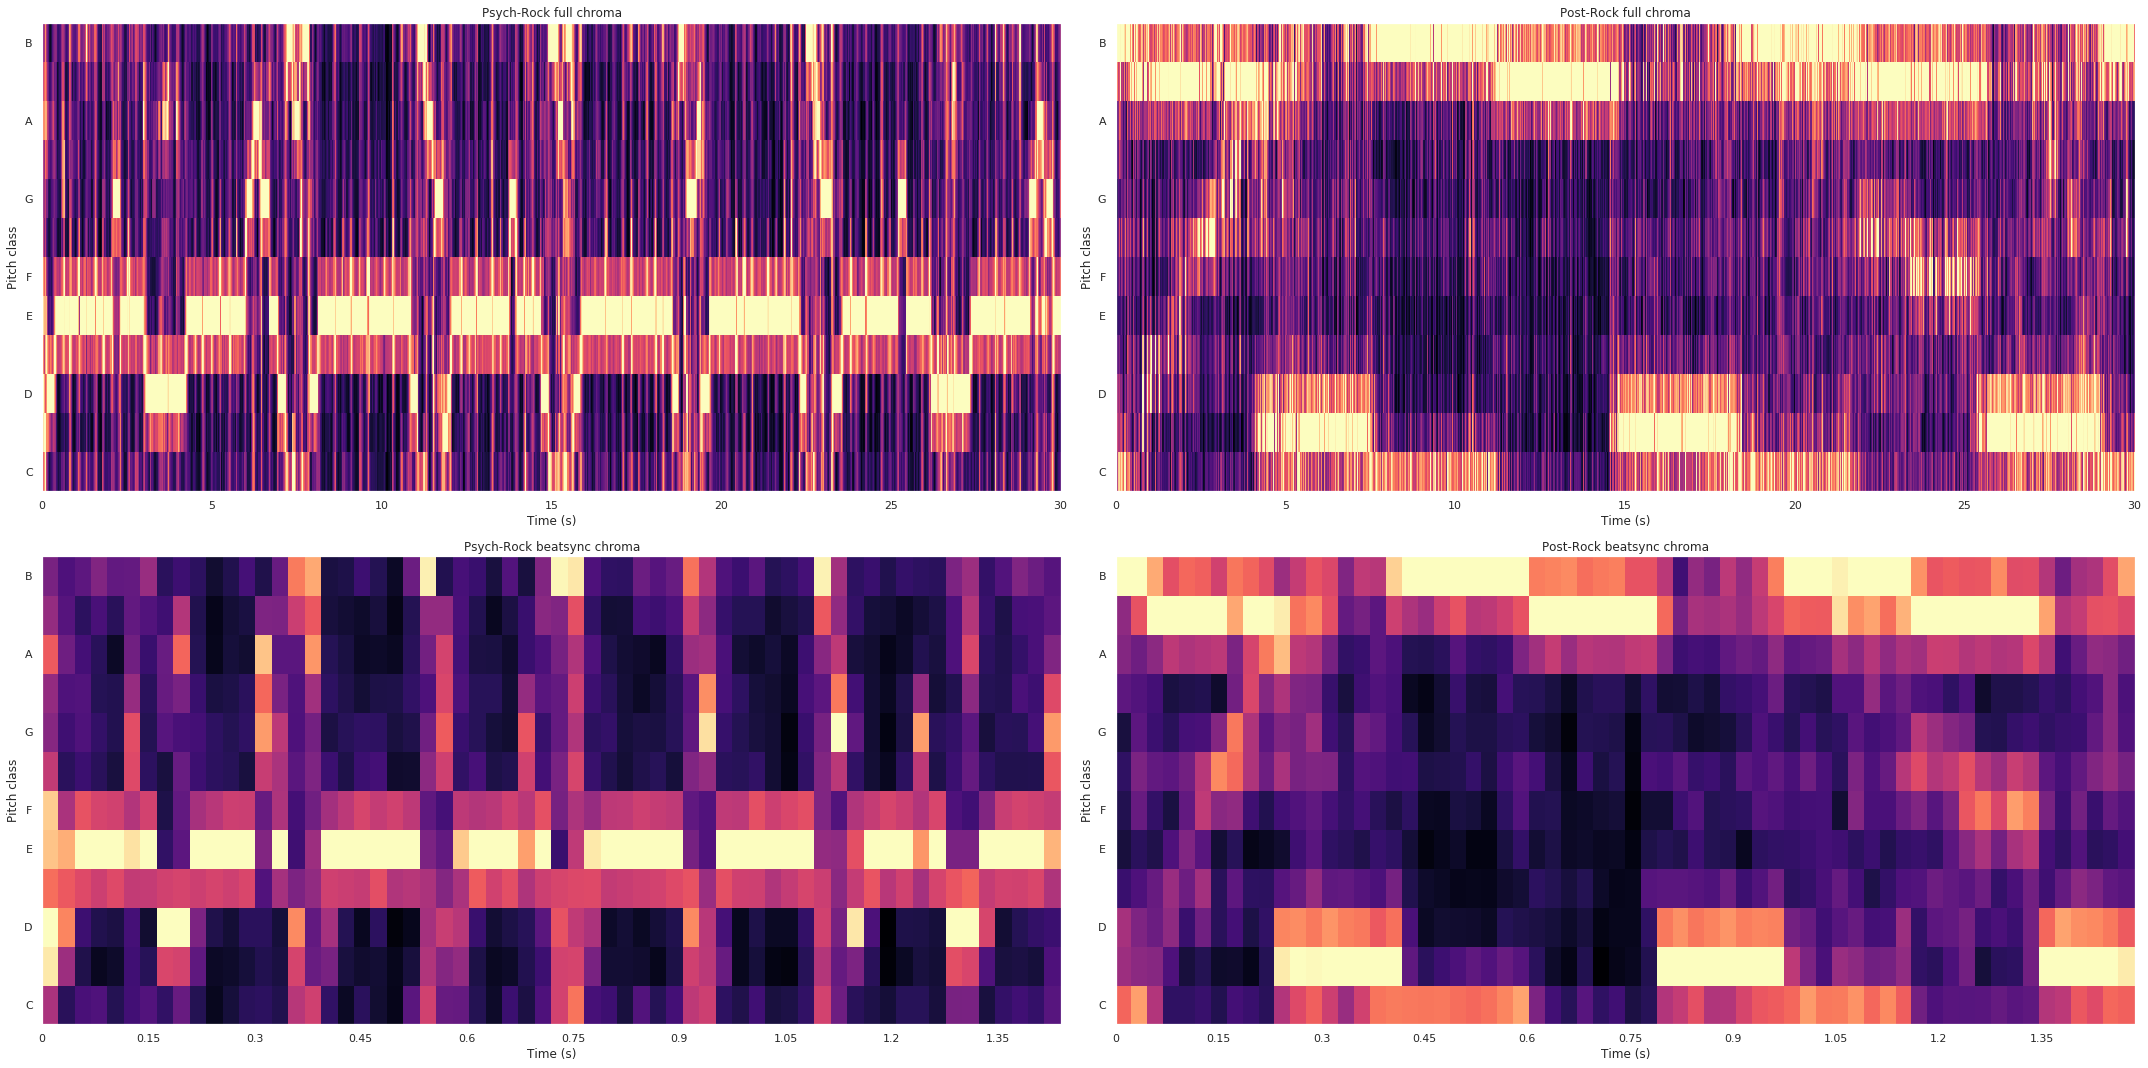

In [6]:
fig = plt.figure (figsize = (30, 15))
ax1 = fig.add_subplot (2, 2, 1)
ax1 = specshow (chrom1, x_axis = 's', y_axis = 'chroma')
ax1.set_title (label1 + ' full chroma')
ax2 = fig.add_subplot (2, 2, 2)
ax2 = specshow (chrom2, x_axis = 's', y_axis = 'chroma')
ax2.set_title (label2 + ' full chroma')
ax3 = fig.add_subplot (2, 2, 3)
ax3 = specshow (chrom1_b, x_axis = 's', y_axis = 'chroma')
ax3.set_title (label1 + ' beatsync chroma')
ax4 = fig.add_subplot (2, 2, 4)
ax4 = specshow (chrom2_b, x_axis = 's', y_axis = 'chroma')
ax4.set_title (label2 + ' beatsync chroma')
fig.tight_layout ()
plt.show ()

As explained [here][wikichroma], a signal's chroma features denote each timestep's division in 12 pitch classes. We also check the chromagrams' dimensions:

[wikichroma]: <https://en.wikipedia.org/wiki/Chroma_feature>

In [7]:
print (chrom1.shape)
print (chrom2_b.shape)

(12, 1293)
(12, 64)


As a result, we end up concluding that chromagrams of the beat-synced versions should provide the most efficient input for training LSTM. The advantage over mel frequencies is the much smaller first dimension, which corresponds to the input of the LSTM at each timestep. Again, smaller input means less weights to train and thus faster training.

> ***CAUTION:*** The question regarding sufficient information content in the beatsynced chromagrams cannot be answered yet. For this, completing the next 2 steps is essential.

### Step 4
Let's analyze the provided [code][cd] step-by-step.

```python
class SpectrogramDataset(Dataset):
    def __init__(self, path, class_mapping=None, train=True, max_length=-1, read_spec_fn=read_spectrogram):
        t = 'train' if train else 'test'
        p = os.path.join(path, t)
        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping)
        self.feats = [read_spec_fn(os.path.join(p, f)) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(self.label_transformer.fit_transform(labels)).astype('int64')

    def get_files_labels(self, txt, class_mapping):
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            label = l[1]
            if class_mapping:
                label = class_mapping[l[1]]
            if not label:
                continue
            # Kaggle automatically unzips the npy.gz format so this hack is needed
            _id = l[0].split('.')[0]
            npy_file = '{}.fused.full.npy'.format(_id)
            files.append(npy_file)
            labels.append(label)
        return files, labels

    def __getitem__(self, item):
        # TODO: Inspect output and comment on how the output is formatted
        l = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], l

    def __len__(self):
        return len(self.labels)
```
The ```SpectrogramDataset``` class extends the [```Dataset```][ds] class of ```PyTorch```. The arguments wanted are:
- ```path```: denotes the location of the files
- ```class_mapping```: if given, applies a simplification of the classes by mapping similar ones to their fundamental ancestors (e.g. 'Psych-Rock' can be mapped to 'Rock', 'Pop' to 'Noise', etc.)
- ```train```: if ```True```, reads ```train_labels.txt```. Else the class reads ```test_labels.txt```.
- ```max_length```: used for zero-padding data through ```PaddingTransform``` class, shown below. If value is negative, the whole initial signal is used.
- ```read_spec_fn```: defines whether the signal read will be a full spectrogram (meaning a merged mel-spectrogram/chromagram), or just the one of the two signals (mel-spectrogram or chromagram).

```python
class PaddingTransform(object):
    def __init__(self, max_length, padding_value=0):
        self.max_length = max_length
        self.padding_value = padding_value

    def __call__(self, s):
        if len(s) == self.max_length:
            return s

        if len(s) > self.max_length:
            return s[:self.max_length]

        if len(s) < self.max_length:
            s1 = copy.deepcopy(s)
            pad = np.zeros((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
            s1 = np.vstack((s1, pad))
            return s1
```

>***ATTENTION:*** Note the uselessness of the ```padding_value``` variable in ```PaddingTranform```: since ```zeros``` is used in ```__call__```, the variable has no meaning and the output will always be zero-padded. A more flexible alternative would be:
```python
pad = padding_value * np.ones((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
```

Upon initialization, the following things happen:

- file names and labels are read via the ```get_files_labels``` method. Only valid classes defined in ```class_mapping``` are kept.
- based on the file names read, the function defined in ```read_spec_fn``` is called repeatedly, forming a list of signals to be fed to the model. The functions available are ```read_fused_spectrogram```, ```read_mel_spectrogram``` and ```read_chromagram```, and they are shown below. Note the fact that tre **transpose** of the loaded file is returned, since ```PyTorch``` convention is to put samples as rows and features as columns.
- samples dimensions are saved.
- in case ```max_length``` is non-negative, all read samples are zero-padded through ```PaddingTransform```, shown above.
- ```sklearn```'s ```LabelEncoder``` is used to transform string-valued labels to $n$ integers, where $n$ is the total number of unique classes.
- labels are turned into ```NumPy``` array.

```python
def read_fused_spectrogram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)
    return spectrogram.T


def read_mel_spectrogram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)[:128]
    return spectrogram.T

    
def read_chromagram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)[128:]
    return spectrogram.T

class LabelTransformer(LabelEncoder):
    def inverse(self, y):
        try:
            return super(LabelTransformer, self).inverse_transform(y)
        except:
            return super(LabelTransformer, self).inverse_transform([y])

    def transform(self, y):
        try:
            return super(LabelTransformer, self).transform(y)
        except:
            return super(LabelTransformer, self).transform([y])
```

Now that the code functionality is clear enough, let us elaborate on the need for simplifying the classes: once again, the reason is training efficiency. More classes would require bigger networks.

Below we isolate the labels for the train set of data. We apply the class mapping also provided in order to draw 'before' and 'after' histograms, as requested by the exercise. To do all that, we use the ```SpectrogramDataset``` class.

We first transcribe all provided code below:

[cd]: <https://www.kaggle.com/geoparslp/data-loading-tutorial>
[ds]: <https://pytorch.org/docs/stable/data.html#map-style-datasets>

In [8]:
import copy
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from torch.utils.data import SubsetRandomSampler, DataLoader
import re

# Combine similar classes and remove underrepresented classes
class_mapping = {
    'Rock': 'Rock',
    'Psych-Rock': 'Rock',
    'Indie-Rock': None,
    'Post-Rock': 'Rock',
    'Psych-Folk': 'Folk',
    'Folk': 'Folk',
    'Metal': 'Metal',
    'Punk': 'Metal',
    'Post-Punk': None,
    'Trip-Hop': 'Trip-Hop',
    'Pop': 'Pop',
    'Electronic': 'Electronic',
    'Hip-Hop': 'Hip-Hop',
    'Classical': 'Classical',
    'Blues': 'Blues',
    'Chiptune': 'Electronic',
    'Jazz': 'Jazz',
    'Soundtrack': None,
    'International': None,
    'Old-Time': None
}

# TODO: Comment on howv the train and validation splits are created.
# TODO: It's useful to set the seed when debugging but when experimenting ALWAYS set seed=None. Why?
def torch_train_val_split(
        dataset, batch_train, batch_eval,
        val_size=.2, shuffle=True, seed=None):
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    val_split = int(np.floor(val_size * dataset_size))
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    train_indices = indices[val_split:]
    val_indices = indices[:val_split]

    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset,
                              batch_size=batch_train,
                              sampler=train_sampler)
    val_loader = DataLoader(dataset,
                            batch_size=len (val_indices),
                            sampler=val_sampler)
    return train_loader, val_loader

def read_fused_spectrogram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)
    return spectrogram.T

def read_mel_spectrogram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)[:128]
    return spectrogram.T
   
def read_chromagram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)[128:]
    return spectrogram.T

class LabelTransformer(LabelEncoder):
    def inverse(self, y):
        try:
            return super(LabelTransformer, self).inverse_transform(y)
        except:
            return super(LabelTransformer, self).inverse_transform([y])

    def transform(self, y):
        try:
            return super(LabelTransformer, self).transform(y)
        except:
            return super(LabelTransformer, self).transform([y])

# TODO: Comment on why padding is needed
class PaddingTransform(object):
    def __init__(self, max_length, padding_value=0):
        self.max_length = max_length
        self.padding_value = padding_value

    def __call__(self, s):
        if len(s) == self.max_length:
            # return s
            return torch.from_numpy (s).type ('torch.FloatTensor')

        if len(s) > self.max_length:
            # return s[:self.max_length]
            return torch.from_numpy (s[:self.max_length]).type ('torch.FloatTensor')

        if len(s) < self.max_length:
            s1 = copy.deepcopy(s)
            pad = np.zeros((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
            s1 = np.vstack((s1, pad))
            # return s1
            return torch.from_numpy (s1).type ('torch.FloatTensor')
   
class SpectrogramDataset(Dataset):
    def __init__(self, path, class_mapping=None, train=True, max_length=-1, read_spec_fn=read_chromagram):
        t = 'train' if train else 'test'
        p = os.path.join(path, t)
        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping)
        self.feats = [read_spec_fn(os.path.join(p, f)) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(self.label_transformer.fit_transform(labels)).astype('int64')

    def get_files_labels(self, txt, class_mapping):
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            label = l[1]
            if class_mapping:
                label = class_mapping[l[1]]
            if not label:
                continue
            # Kaggle automatically unzips the npy.gz format so this hack is needed
            _id = l[0].split('.')[0]
            npy_file = '{}.fused.full.npy'.format(_id)
            files.append(npy_file)
            labels.append(label)
        return files, labels

    def __getitem__(self, item):
        # TODO: Inspect output and comment on how the output is formatted
        l = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], l

    def __len__(self):
        return len(self.labels)

Then, we produce a ```SpectrogramDataset``` instance:

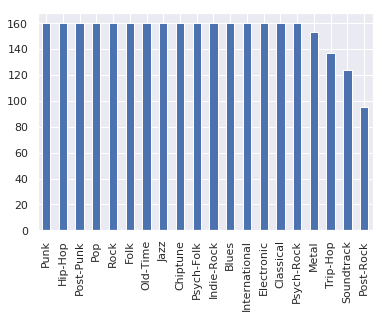

In [9]:

fullPath = os.path.join (mainPath, 'fma_genre_spectrograms_beat')

import pandas as pd

df = pd.read_csv(os.path.join (fullPath, 'train_labels.txt'), sep='\t')
unique = df['Genre'].unique()
df['Genre'].value_counts().plot(kind='bar')
plt.show ()

Finally, we draw the histograms. We observe that following:
- there are actually no underrepresented classes in the non-mapped datasets, keeping in mind the differences observed in the respective mapped instances.
- the total number of classes after mapping drops by $50\%$

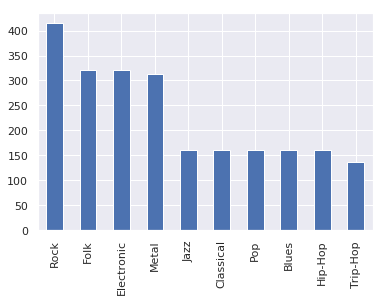

In [10]:
import torch

specset_map_train = SpectrogramDataset (fullPath, class_mapping, read_spec_fn = read_mel_spectrogram)
genres = {'Genres':[]}
for item in specset_map_train:
    # class number to class name
    genres['Genres'].append(specset_map_train.label_transformer.inverse(item[1])[0])   
# hist class population
df_2 = pd.DataFrame(genres)
df_2.head()
df_2['Genres'].value_counts().plot(kind='bar')
plt.show ()

### Step 5
Since re-using the code of the last exercise is permitted, we will just paste the code below with no further explanation. There are some minor adjustments, mainly relevant to GPU utilization.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class BasicLSTM(nn.Module):
    """
    Implements LSTM net, based on the inputs given.
        rnn_size: hidden layer width
        output_dim: number of classes
        num_layers, bidirectional: self-explanatory.
        dropout: probability of dropout
    """
    def __init__(self, input_dim, rnn_size, output_dim, num_layers,         \
                 bidirectional = False, dropout = 0):
        """
        Initializes network.
        """
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        # feature_size refers to the input vectors for the linear layers.
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.lstm = nn.LSTM (input_dim, rnn_size, num_layers,               \
                             batch_first = True, dropout = dropout,         \
                             bidirectional = self.bidirectional)
        # lin implements the layer just before the output.
        self.lin = nn.Linear (self.feature_size, output_dim)
        self.layers = num_layers
        # hidden marks the number of nodes in each LSTM's hidden layer.
        self.hidden = rnn_size

    def forward(self, x, lengths):
        """
        Returns LSTM final inferences for all sequences in batch x.
        """
        # h_0 initializes the hidden state. Dimensions according to the
        # documentation. Grad is set so that training can take place.
        h_0 = torch.zeros (self.layers * (1 + int (self.bidirectional)),    \
                           len (x), self.hidden).requires_grad_ ()
        # c_0 initializes the cell state.
        c_0 = h_0
        if torch.cuda.is_available ():
            h_0 = h_0.cuda ()
            c_0 = c_0.cuda ()
        # both hidden and cell states are detached from the grad graph, so that
        # each batch is trained separately.
        out, (h_n, c_n) = self.lstm (x, (h_0.detach_ (), c_0.detach_ ()))
        # existing functions are used to isolate the outputs at the actual
        # endpoints of each sequence (sequence lengths are various)
        last_outputs = self.lin (self.last_timestep (out, lengths,          \
                                 self.bidirectional))
        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account
            the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = outputs.size(-1) // 2
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

def fit (net, epochs, lr, loader, v_loader, L2 = 0, valTime = 5,            \
         showVal = False, earlyStopping = False):
    #Define loss function.
    loss_func = F.cross_entropy
    #Use Stochastic Gradient Descent of the optim package for parameter updates.
    opt = torch.optim.SGD (net.parameters (), lr = lr, weight_decay = L2)
    #A flag  for validation loss.
    old_valid_loss = -62
    old_net = net
    train_losses = []
    val_losses = []
    if earlyStopping:
        es_counter = 0
    for epoch in range (epochs):
        epoch_loss = 0
        #It is wise, according to the documentation, to put the network in
        #training mode before each batch is loaded.
        net.train ()
        for xb, yb, lb in loader:
            if torch.cuda.is_available ():
                xb = xb.cuda ()
                yb = yb.cuda ()
                lb = lb.cuda ()
            out = net.forward (xb, lb)
            if torch.cuda.is_available ():
                loss = loss_func (out, yb.type ('torch.LongTensor').cuda ())
            else:
                loss = loss_func (out, yb.type ('torch.LongTensor'))
            epoch_loss += loss
            #Backpropagate the loss.
            loss.backward ()
            #Update weights, bias.
            opt.step ()
            #A new batch is ready to be loaded. Clean gradient memory!
            opt.zero_grad ()
        print ('Train loss at epoch', epoch, ':', float (epoch_loss))
        train_losses.append (float (loss))
        val_losses.append (0)
        #At the end of each epoch, the network is put in evaluation mode.
        net.eval ()
        # Will infer on the validation set (and maybe check for early       \
        # stopping) every earlyCheck epochs.
        if showVal and epoch % valTime == 0:
            #No reason to keep the gradient for the validation set.
            with torch.no_grad ():
                valid_loss = 0
                for xb, yb, lb in v_loader:
                    if torch.cuda.is_available ():
                        xb = xb.cuda ()
                        yb = yb.cuda ()
                        lb = lb.cuda ()
                    out = net.forward (xb, lb)
                    if torch.cuda.is_available ():
                        valid_loss += loss_func (out, yb.type ('torch.LongTensor').cuda ())
                    else:
                        valid_loss += loss_func (out, yb.type ('torch.LongTensor'))
                print ('Validation loss at epoch', epoch, ':',              \
                       float (valid_loss))
                val_losses [-1] = (float (valid_loss))
                #Early stopping!
                if old_valid_loss != -62 and valid_loss > old_valid_loss    \
                                         and earlyStopping:
                    # if the criterion is broken, pause training and return the
                    # previous logged net
                    es_counter += 1
                    if es_counter > 3:
                        net = old_net
                        print ('Training finished due to early stopping. Actual \
                               number of epochs:', epoch)
                        break
                    print ('EarlyStopping counter:', es_counter, 'out of 3.')
                elif old_valid_loss == -62 or (old_valid_loss != -62 and valid_loss < old_valid_loss):
                    print ('Evaluation passed. Saving best old net, resetting EarlyStopping.')
                    # If the validation has passed, keep the net logged!
                    old_net = net
                    es_counter = 0
                    old_valid_loss = valid_loss                   
    train_losses = np.array (train_losses)
    val_losses = np.array (val_losses)
    train_losses = train_losses / train_losses.max ()
    val_losses = val_losses / val_losses.max ()
    return net, train_losses, val_losses

Next, we create a wrapper for simplifying the experiments to follow (```train_wrapper```). Regarding the validation and test sets, we define single-batch datasets. We define 300 timesteps as maximum length for all data. We take care to free dataset variables once the loaders are ready. The LSTM we train is 2-layered and bidirectional, also employing dropout.

In [12]:
def train_wrapper (mainPath, suffix, class_mapping, r_spec, rnn_size):
    """
    1) Creates train, test datasets.
    2) Creates respective loaders.
    3) Returns trained network and its test loader.
    """
    dataPath = os.path.join (mainPath, suffix)
    dataSet_mel_train = SpectrogramDataset (dataPath, class_mapping, True, max_length = 300, \
                                            read_spec_fn = r_spec)
    dataSet_mel_test = SpectrogramDataset (dataPath, class_mapping, False, max_length = 300, \
                                           read_spec_fn = r_spec)
    print ('Datasets ready!')
    test_loader = DataLoader (dataSet_mel_test, batch_size = len (dataSet_mel_test))
    train_loader, val_loader = torch_train_val_split (dataSet_mel_train, 16, 6)
    print ('Loaders ready!')
    lstm_mel = BasicLSTM (dataSet_mel_train.feats[0].shape[-1], rnn_size, 10, 2, True, 0.01)
    dataset_mel_train = None
    dataset_mel_test = None
    if torch.cuda.is_available ():
        lstm_mel = lstm_mel.cuda ()
    print ('Commencing training...')
    lstm_mel = fit (lstm_mel, 500, 10e-3, train_loader, val_loader, 0.01, showVal = True,    \
                    earlyStopping = True)
    return lstm_mel, test_loader

We now are ready to perform the requested experiments.

In [13]:
print ('Starting with full mel data.')
lstm_mel, test_mel = train_wrapper (mainPath, 'fma_genre_spectrograms', class_mapping, \
                                    read_mel_spectrogram, 40)

Starting with full mel data.
Datasets ready!
Loaders ready!
Commencing training...
Train loss at epoch 0 : 262.8752136230469
Validation loss at epoch 0 : 2.215926170349121
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 1 : 257.44488525390625
Train loss at epoch 2 : 255.8866424560547
Train loss at epoch 3 : 255.5830078125
Train loss at epoch 4 : 255.4086151123047
Train loss at epoch 5 : 254.05352783203125
Validation loss at epoch 5 : 2.16737699508667
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 6 : 252.886962890625
Train loss at epoch 7 : 251.9005889892578
Train loss at epoch 8 : 251.0548858642578
Train loss at epoch 9 : 249.027099609375
Train loss at epoch 10 : 247.57882690429688
Validation loss at epoch 10 : 2.131535768508911
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 11 : 246.4304962158203
Train loss at epoch 12 : 245.8271942138672
Train loss at epoch 13 : 244.41539

In [14]:
print ('Starting with beat-synced mel data.')
lstm_beat_mel, test_beat_mel = train_wrapper (mainPath, 'fma_genre_spectrograms_beat', \
                                              class_mapping, read_mel_spectrogram, 30)

Starting with beat-synced mel data.
Datasets ready!
Loaders ready!
Commencing training...
Train loss at epoch 0 : 261.946533203125
Validation loss at epoch 0 : 2.2485735416412354
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 1 : 258.62628173828125
Train loss at epoch 2 : 256.44927978515625
Train loss at epoch 3 : 255.00889587402344
Train loss at epoch 4 : 253.8232421875
Train loss at epoch 5 : 252.63824462890625
Validation loss at epoch 5 : 2.183666706085205
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 6 : 251.21263122558594
Train loss at epoch 7 : 250.32388305664062
Train loss at epoch 8 : 248.05726623535156
Train loss at epoch 9 : 245.922119140625
Train loss at epoch 10 : 243.9621124267578
Validation loss at epoch 10 : 2.1286263465881348
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 11 : 243.66598510742188
Train loss at epoch 12 : 243.28700256347656
Train loss at epoc

In [15]:
print ('Starting with beat-synced chromagram data.')
lstm_chrom, test_chrom = train_wrapper (mainPath, 'fma_genre_spectrograms_beat', class_mapping, \
                                        read_chromagram, 25)

Starting with beat-synced chromagram data.
Datasets ready!
Loaders ready!
Commencing training...
Train loss at epoch 0 : 264.55029296875
Validation loss at epoch 0 : 2.273320198059082
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 1 : 262.25042724609375
Train loss at epoch 2 : 260.7927551269531
Train loss at epoch 3 : 259.7060852050781
Train loss at epoch 4 : 258.9991455078125
Train loss at epoch 5 : 258.58404541015625
Validation loss at epoch 5 : 2.2299585342407227
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 6 : 258.2363586425781
Train loss at epoch 7 : 258.2524108886719
Train loss at epoch 8 : 258.1418151855469
Train loss at epoch 9 : 258.17303466796875
Train loss at epoch 10 : 258.1460876464844
Validation loss at epoch 10 : 2.223543643951416
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 11 : 258.03057861328125
Train loss at epoch 12 : 257.93475341796875
Train loss at

In [16]:
print ('Starting with beat-synced fused data.')
lstm_fused, test_fused = train_wrapper (mainPath, 'fma_genre_spectrograms_beat', class_mapping, \
                                        read_fused_spectrogram, 50)

Starting with beat-synced fused data.
Datasets ready!
Loaders ready!
Commencing training...
Train loss at epoch 0 : 262.8657531738281
Validation loss at epoch 0 : 2.2160866260528564
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 1 : 258.5765075683594
Train loss at epoch 2 : 256.6299133300781
Train loss at epoch 3 : 255.87887573242188
Train loss at epoch 4 : 254.77796936035156
Train loss at epoch 5 : 253.42926025390625
Validation loss at epoch 5 : 2.1491644382476807
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 6 : 252.30482482910156
Train loss at epoch 7 : 249.9908447265625
Train loss at epoch 8 : 248.15060424804688
Train loss at epoch 9 : 245.9521484375
Train loss at epoch 10 : 243.7473602294922
Validation loss at epoch 10 : 2.061432123184204
Evaluation passed. Saving best old net, resetting EarlyStopping.
Train loss at epoch 11 : 242.65118408203125
Train loss at epoch 12 : 239.80242919921875
Train loss at ep

### Step 6
We now have all the required data for the final step. We create ```finalStuff``` function for simplicity.

In [17]:
from sklearn.metrics import classification_report

def finalStuff (net, test_loader):
    for xb, yb, lb in test_loader:
        if torch.cuda.is_available ():
            xb = xb.cuda ()
            yb = yb.cuda ()
            lb = lb.cuda ()
        out = net[0].forward (xb, lb)
        preds = F.softmax (out, dim = -1).argmax (dim = -1)
    for label in range (10):
        print (classification_report (yb.cpu (), preds.cpu (), list (range (1 + label))))
    return

We repeatedly invoke ```finalStuff``` to produce the requested reports.

In [18]:
print ('Requesting report for full mel data...')
finalStuff (lstm_mel, test_mel)

Requesting report for full mel data...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40

   micro avg       0.00      0.00      0.00        40
   macro avg       0.00      0.00      0.00        40
weighted avg       0.00      0.00      0.00        40

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      0.20      0.30        40

   micro avg       0.62      0.10      0.17        80
   macro avg       0.31      0.10      0.15        80
weighted avg       0.31      0.10      0.15        80

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      0.20      0.30        40
           2       0.27      0.44      0.33        80

   micro avg       0.30      0.27      0.28       160
   macro avg       0.29      0.21      0.21       160
weighted avg       0.29      0.27  

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
print ('Requesting report for beat-synced mel data...')
finalStuff (lstm_beat_mel, test_beat_mel)

Requesting report for beat-synced mel data...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40

   micro avg       0.00      0.00      0.00        40
   macro avg       0.00      0.00      0.00        40
weighted avg       0.00      0.00      0.00        40

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.35      0.45      0.39        40

   micro avg       0.35      0.23      0.27        80
   macro avg       0.17      0.23      0.20        80
weighted avg       0.17      0.23      0.20        80

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.35      0.45      0.39        40
           2       0.17      0.96      0.29        80

   micro avg       0.19      0.59      0.29       160
   macro avg       0.17      0.47      0.23       160
weighted avg       0.17     

In [20]:
print ('Requesting report for beat-synced chromagram data...')
finalStuff (lstm_chrom, test_chrom)

Requesting report for beat-synced chromagram data...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40

   micro avg       0.00      0.00      0.00        40
   macro avg       0.00      0.00      0.00        40
weighted avg       0.00      0.00      0.00        40

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40

   micro avg       0.00      0.00      0.00        80
   macro avg       0.00      0.00      0.00        80
weighted avg       0.00      0.00      0.00        80

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        80

   micro avg       0.00      0.00      0.00       160
   macro avg       0.00      0.00      0.00       160
weighted avg       0.

In [21]:
print ('Requesting report for beat-synced fused data...')
finalStuff (lstm_fused, test_fused)

Requesting report for beat-synced fused data...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40

   micro avg       0.00      0.00      0.00        40
   macro avg       0.00      0.00      0.00        40
weighted avg       0.00      0.00      0.00        40

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      0.30      0.40        40

   micro avg       0.60      0.15      0.24        80
   macro avg       0.30      0.15      0.20        80
weighted avg       0.30      0.15      0.20        80

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      0.30      0.40        40
           2       0.28      0.28      0.28        80

   micro avg       0.35      0.21      0.26       160
   macro avg       0.29      0.19      0.23       160
weighted avg       0.29   

Below we answer the theoretical questions acoompanying the exercise description. Note that in the following statements, by *received* samples we refer to the sum of true and false positives that were classified with a certain label.
- **precision** defines the ratio of true positives over the received samples for each class. Informally, it expresses the probability that e.g. a song classified as Rock was actually Rock.
- **recall** defines the ratio of true positives over the *true* population for each class. In other words, it expresses the probability that a *true* Rock song was classified as such.
- **F1-score** is the harmonic mean of precision and recall. It attempts to provide a unified, balnced view of both quantities.
- **macro**-averaged versions of the above are the averages of each quantity over all classes.
- **accuracy** defines the ratio of total true positives over the whole dataset. No weighting with regard to each class population is taken into consideration. It expresses the probability that a random song was classified correctly.
- **micro**-averaged versions of precision, recall and F1-score are computed for **subsets** of the total classes (which explains the second ```for``` loop in ```finalStuff```). Instead of averaging over already-computed percentages, like in the macro-case, here we consider and sum true positives of each class belonging in the subset. If the subset is the whole set, then micro-averages correspond to accuracy.
- high discrepancies between accuracy and F1 score could be found in cases of under- or over-represented classes (or both). If there were 1000 Rock songs and 10 songs belonging to each other class, a well-trained classifier would exhibit high overall accuracy, but low class-wise F1-score.
- high discrepancies between micro- and macro-averaged F1-score also apply to unevenly distributed classes.
- an example problem where high precision is preferred over high recall would be an automated talent show: we would be extremely interested in picking **some** talented contestants, even if this meant ruining the dreams of other, equally talented ones (because a talent show, even if automated, has limited resources). The reverse case of high recall/low precision would be a cancer exam.
    - just opting for accuracy or F1-score in such sensitive cases is inefficient. Both of them are agnostic towards precision and recall (to be fair, accuracy is even **more** agnostic than F1, since the latter just tries to balance things)